In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
import matplotlib.pyplot as plt

In [2]:
merged_data = pd.read_csv('merged_data.csv')

In [3]:
# # Only uncomment this to see feature selection results

# # Filling the null values of fields with the mean value
# features = merged_data.drop(['Date', 'Month', 'index', 'flow'], axis=1).columns

# top_list = ['month', 'Precipitation_sum_station_6', 'Precipitation_average_station_4', 'Precipitation_average_station_6',
#            'Precipitation_average_station_3', 'Precipitation_sum_station_2', 'Windspread_average_station_1', 
#             'Tempreture_Max_average_station_6', 'Precipitation_average_station_2', 'Precipitation_sum_station_3',
#             'Precipitation_sum_station_4', 'Windspread_average_station_2', 'Precipitation_sum_station_5', 
#             'Precipitation_sum_station_5', 'Humidity_average_station_3', 'Windspread_average_station_4',
#            'Solar_radiation_average_station_3', 'Solar_radiation_average_station_4', 'Precipitation_sum_station_1',
#             'Precipitation_average_station_5']
# for feature in features:
#     merged_data[feature] = merged_data[feature].fillna(merged_data[feature].mean())
#     if feature not in top_list:
#         merged_data = merged_data.drop(feature, axis=1)





In [4]:
features_ordered_by_pvi = [
    'month',
    'Precipitation_sum_station_6', 
    'Precipitation_average_station_4', 
    'Precipitation_average_station_6', 
    'Precipitation_average_station_3', 
    'Precipitation_sum_station_2',
    'Windspread_average_station_1',
    'Tempreture_Max_average_station_6',
    'Precipitation_average_station_2',
    'Precipitation_sum_station_3',
    'Precipitation_sum_station_4',
    'Windspread_average_station_2',
    'Precipitation_sum_station_5',
    'Solar_radiation_average_station_2',
    'Humidity_average_station_3',
    'Windspread_average_station_4',
    'Solar_radiation_average_station_3',
    'Solar_radiation_average_station_4',
    'Precipitation_sum_station_1',
    'Precipitation_average_station_5',
    
    'Humidity_average_station_1',
    'Windspread_average_station_3',
    'Solar_radiation_average_station_5',
    'Humidity_average_station_6',
    'Tempreture_Max_average_station_3',
    'Humidity_average_station_4',
    'Windspread_average_station_6',
    'Solar_radiation_average_station_6',
    'Humidity_average_station_5',
    'Tempreture_Max_average_station_2',
    'Humidity_average_station_2',
    'Tempreture_Max_average_station_4',
    'Tempreture_Max_average_station_1',
    'Tempreture_Min_average_station_2',
    'Tempreture_Min_average_station_4',
    'Precipitation_average_station_1',
    'Tempreture_Max_average_station_5',
    'Tempreture_Min_average_station_1',
    'Tempreture_Min_average_station_5',
    'Windspread_average_station_5',
    'Solar_radiation_average_station_1',
    'Tempreture_Min_average_station_3',
    'Tempreture_Min_average_station_6'
]


In [5]:
features = merged_data.drop(['Date', 'Month', 'index', 'flow'], axis=1).columns
print(len(features))
features

42


Index(['Precipitation_average_station_1', 'Precipitation_average_station_2',
       'Precipitation_average_station_3', 'Precipitation_average_station_4',
       'Precipitation_average_station_5', 'Precipitation_average_station_6',
       'Precipitation_sum_station_1', 'Precipitation_sum_station_2',
       'Precipitation_sum_station_3', 'Precipitation_sum_station_4',
       'Precipitation_sum_station_5', 'Precipitation_sum_station_6',
       'Humidity_average_station_1', 'Humidity_average_station_2',
       'Humidity_average_station_3', 'Humidity_average_station_4',
       'Humidity_average_station_5', 'Humidity_average_station_6',
       'Windspread_average_station_1', 'Windspread_average_station_2',
       'Windspread_average_station_3', 'Windspread_average_station_4',
       'Windspread_average_station_5', 'Windspread_average_station_6',
       'Solar_radiation_average_station_1',
       'Solar_radiation_average_station_2',
       'Solar_radiation_average_station_3',
       'Solar_ra

In [6]:
print(type(merged_data['Month'][0]))

<class 'str'>


In [7]:
# Sort the dataframe by the 'Date' column
merged_data = merged_data.sort_values('Date')

merged_data['month'] = merged_data['Month'].apply(lambda x: int(x.split('-')[1]))

In [8]:
merged_data.describe()

,flow,index,Precipitation_average_station_1,Precipitation_average_station_2,Precipitation_average_station_3,Precipitation_average_station_4,Precipitation_average_station_5,Precipitation_average_station_6,Precipitation_sum_station_1,Precipitation_sum_station_2,...,Tempreture_Max_average_station_4,Tempreture_Max_average_station_5,Tempreture_Max_average_station_6,Tempreture_Min_average_station_1,Tempreture_Min_average_station_2,Tempreture_Min_average_station_3,Tempreture_Min_average_station_4,Tempreture_Min_average_station_5,Tempreture_Min_average_station_6,month
count,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,...,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.00000
mean,12.428842,407.500000,2.535044,2.522163,1.725542,2.455663,2.358416,2.010759,76.883321,76.506740,...,28.684352,28.582820,27.082502,17.521954,16.317304,15.601672,17.462526,17.116908,15.393088,6.50000
std,21.590807,235.703203,2.192432,2.259354,1.855852,2.294164,2.487847,2.068270,66.470180,68.582523,...,0.953199,1.075050,1.293161,1.147688,1.126259,1.121887,1.210265,1.165193,1.154100,3.45417
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,26.557419,26.095161,24.046452,14.094839,12.957097,12.382258,13.933871,13.629355,12.028710,1.00000
25%,0.928500,203.750000,0.453917,0.496583,0.303306,0.231333,0.089113,0.232734,13.690000,14.937500,...,27.956414,27.748616,26.008433,16.997944,15.606000,14.835333,16.775064,16.417823,14.596798,3.75000
50%,4.140000,407.500000,2.235161,2.077102,1.110645,2.022790,1.757909,1.366989,68.080000,63.215000,...,28.627581,28.606094,27.190081,17.786753,16.545323,15.780645,17.752634,17.372327,15.630323,6.50000
75%,14.625000,611.250000,4.094804,3.939285,2.658006,4.150242,3.864250,3.309214,122.772500,120.292500,...,29.331833,29.392968,28.082056,18.302440,17.120968,16.431452,18.312083,17.953126,16.229836,9.25000
max,227.000000,815.000000,12.087333,12.803871,10.986452,12.295161,17.435161,12.708065,362.620000,396.920000,...,31.293548,31.539677,30.358929,20.023871,18.889667,18.366667,20.000968,19.664667,18.125000,12.00000


In [9]:
merged_data = merged_data.sort_values('Date')

merged_data['month'] = merged_data['Month'].apply(lambda x: int(x.split('-')[1]))

In [10]:
# removing the outlier flows
cleaned_data = merged_data[(merged_data['flow'] <= 120) & (merged_data['flow'] >= 0)]


In [11]:
len(cleaned_data[cleaned_data['flow']<=60])/len(cleaned_data)

0.9704069050554871

In [12]:
cleaned_data[['Humidity_average_station_1', 'Humidity_average_station_2', 'Humidity_average_station_3',
                 'Humidity_average_station_4', 'Humidity_average_station_5', 'Humidity_average_station_6']].min()

Humidity_average_station_1    0.368533
Humidity_average_station_2    0.375167
Humidity_average_station_3    0.402065
Humidity_average_station_4    0.363900
Humidity_average_station_5    0.392600
Humidity_average_station_6    0.439581
dtype: float64

In [13]:
cleaned_data[['Humidity_average_station_1', 'Humidity_average_station_2', 'Humidity_average_station_3',
                 'Humidity_average_station_4', 'Humidity_average_station_5', 'Humidity_average_station_6']].max()

Humidity_average_station_1    0.876167
Humidity_average_station_2    0.846067
Humidity_average_station_3    0.843387
Humidity_average_station_4    0.882452
Humidity_average_station_5    0.847586
Humidity_average_station_6    0.849613
dtype: float64

## Box_Cox 

In [14]:
import pandas as pd
from scipy import stats

# Define the numerical features
numerical_features = cleaned_data.select_dtypes(include=['float64', 'int64']).columns
lambdas = {}

# Apply Box-Cox Transformation
for feature in numerical_features:
    # Shift data to ensure all values are positive if necessary
    min_value = cleaned_data[feature].min()
    shift_value = 1 - min_value + 1e-6  # Add a small constant to ensure no zero values
    cleaned_data[f'{feature}_shifted'] = cleaned_data[feature] + shift_value

    # Apply Box-Cox transformation
    cleaned_data[feature], lambdas[feature] = stats.boxcox(cleaned_data[f'{feature}_shifted'])

    # Drop the shifted column as it's no longer needed
    cleaned_data.drop(f'{feature}_shifted', axis=1, inplace=True)

for feature, lambda_value in lambdas.items():
    print(f'Lambda for {feature}: {lambda_value}')

C:\Users\Ali\AppData\Local\Temp\ipykernel_23748\2498150799.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data[f'{feature}_shifted'] = cleaned_data[feature] + shift_value
C:\Users\Ali\AppData\Local\Temp\ipykernel_23748\2498150799.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data[feature], lambdas[feature] = stats.boxcox(cleaned_data[f'{feature}_shifted'])
C:\Users\Ali\AppData\Local\Temp\ipykernel_23748\2498150799.py:19: SettingWithCopyWarning: 
A value is trying to be set on a 

Lambda for flow: -0.13378678612096986
Lambda for index: 0.703789042299177
Lambda for Precipitation_average_station_1: 0.1471740201088594
Lambda for Precipitation_average_station_2: -0.0012355790287731682
Lambda for Precipitation_average_station_3: -0.4417405466693998
Lambda for Precipitation_average_station_4: 0.08372485095839649
Lambda for Precipitation_average_station_5: -0.09538489241500678
Lambda for Precipitation_average_station_6: -0.24693859424901982
Lambda for Precipitation_sum_station_1: 0.38124543001574984
Lambda for Precipitation_sum_station_2: 0.32895131247565984
Lambda for Precipitation_sum_station_3: 0.20961293572715034
Lambda for Precipitation_sum_station_4: 0.32682064087364743
Lambda for Precipitation_sum_station_5: 0.24353028983050867
Lambda for Precipitation_sum_station_6: 0.23348384540008643
Lambda for Humidity_average_station_1: 2.135022586684796
Lambda for Humidity_average_station_2: 1.0121354506507703
Lambda for Humidity_average_station_3: 0.07364099481776223
Lamb

C:\Users\Ali\AppData\Local\Temp\ipykernel_23748\2498150799.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data[feature], lambdas[feature] = stats.boxcox(cleaned_data[f'{feature}_shifted'])
C:\Users\Ali\AppData\Local\Temp\ipykernel_23748\2498150799.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data.drop(f'{feature}_shifted', axis=1, inplace=True)
C:\Users\Ali\AppData\Local\Temp\ipykernel_23748\2498150799.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

### r2_score

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Drop non-numeric columns that we won't use in the model
data_model = cleaned_data.drop(columns=['Date', 'Month'])
# data_model = data_model.drop(['Tempreture','Solar radiation', 'Windspread'] , axis=1)

# Define the features (X) and the target variable (y)
X = data_model.drop(['flow'], axis=1)
y = data_model['flow']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=25, random_state=42, max_depth = 15, max_features=15)

# Train the model
rf_regressor.fit(X_train, y_train)

# # Predict on the test set
# y_pred = rf_regressor.predict(X_test)

# Predicting for both training and test sets
y_train_pred = rf_regressor.predict(X_train)
y_test_pred = rf_regressor.predict(X_test)

# Calculate the performance metrics
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)

print(mse, r2)

# Inspect the maximum depth of the trees
# max_depths = [tree.tree_.max_depth for tree in rf_regressor.estimators_]
# max_depth = max(max_depths)

# print(f"The maximum depth of the trees in the RandomForestRegressor is: {max_depth}")
print(len(X_test))
print(len(y_test_pred))

0.2701821536982834 0.7460756544618441
163
163


## train test predictions with box_cox 

In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from scipy import stats
from scipy.special import inv_boxcox

# Assuming cleaned_data is already loaded and prepared

# Ensure 'Date' is a datetime type
cleaned_data['Date'] = pd.to_datetime(cleaned_data['Date'])

# Define the features and target
data_model = cleaned_data.drop(columns=['Date', 'Month'])
features = data_model.drop(['flow', 'index'], axis=1).columns
target = 'flow'

# Split the data into features and target
X = data_model[features]
y = data_model[target]

# Apply Box-Cox transformation to the target
min_value_target = y.min()
shift_value_target = 1 - min_value_target + 1e-6
y_shifted = y + shift_value_target
y_boxcox, lambda_target = stats.boxcox(y_shifted)

# Apply Box-Cox transformation to the features
lambdas_features = {}
for feature in features:
    min_value = X[feature].min()
    shift_value = 1 - min_value + 1e-6
    X[f'{feature}_shifted'] = X[feature] + shift_value
    X[feature], lambdas_features[feature] = stats.boxcox(X[f'{feature}_shifted'])
    X.drop(f'{feature}_shifted', axis=1, inplace=True)

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(n_estimators=25, random_state=42, max_depth=15, max_features=15)

# Set up cross-validation with 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize DataFrames to store the predictions and actuals
train_predictions_df = pd.DataFrame(index=range(len(X)), columns=[f'train{i+1}' for i in range(10)])
test_predictions = np.zeros(len(X))  # Store test predictions

# Initialize lists to store R² score for each fold
r2_train_list = []
r2_test_list = []

# Perform cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_boxcox[train_index], y_boxcox[test_index]
    
    # Train the model
    rf.fit(X_train, y_train)
    
    # Make predictions for the training and test sets
    train_predictions_boxcox = rf.predict(X_train)
    test_predictions_boxcox = rf.predict(X_test)
    
    # Inverse Box-Cox transformation on the predictions
    train_predictions = inv_boxcox(train_predictions_boxcox, lambda_target) - shift_value_target
    test_predictions_fold = inv_boxcox(test_predictions_boxcox, lambda_target) - shift_value_target
    
    # Store predictions in the DataFrame
    train_predictions_df.iloc[train_index, fold] = train_predictions
    test_predictions[test_index] = test_predictions_fold  # Store all test predictions
    
    # Calculate and store R² score for each fold
    r2_train = r2_score(inv_boxcox(y_train, lambda_target) - shift_value_target, train_predictions)
    r2_test = r2_score(inv_boxcox(y_test, lambda_target) - shift_value_target, test_predictions_fold)
    r2_train_list.append(r2_train)
    r2_test_list.append(r2_test)
    
    # Print performance for this fold
    print(f"Fold {fold + 1} - R² Train: {r2_train:.4f}, R² Test: {r2_test:.4f}")

# Print the average R² score across all folds
print(f"Average R² Train: {np.mean(r2_train_list):.4f}, Average R² Test: {np.mean(r2_test_list):.4f}")

# Calculate the average predictions for the training set
train_predictions_df['avg_train'] = train_predictions_df.mean(axis=1)

# Add the 'Date' and 'Actual' columns
train_predictions_df['Date'] = cleaned_data['Date']
train_predictions_df['Actual'] = cleaned_data['flow']

# Create a DataFrame for test predictions
test_predictions_df = pd.DataFrame({
    'Date': cleaned_data['Date'],
    'Actual': cleaned_data['flow'],
    'Test_Predictions': test_predictions
})

# Reorder columns to have 'Date' first in train_predictions_df
columns = ['Date'] + [f'train{i+1}' for i in range(10)] + ['avg_train', 'Actual']
train_predictions_df = train_predictions_df[columns]

# # Save to Excel
# with pd.ExcelWriter('train_test_predictions_test2.xlsx') as writer:
#     train_predictions_df.to_excel(writer, sheet_name='Train', index=False)
#     test_predictions_df.to_excel(writer, sheet_name='Test', index=False)

print("Predictions with actual data have been saved to train_test_predictions.xlsx")


C:\Users\Ali\AppData\Local\Temp\ipykernel_23748\4170846392.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Date'] = pd.to_datetime(cleaned_data['Date'])
C:\Users\Ali\AppData\Local\Temp\ipykernel_23748\4170846392.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[f'{feature}_shifted'] = X[feature] + shift_value
C:\Users\Ali\AppData\Local\Temp\ipykernel_23748\4170846392.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

C:\Users\Ali\AppData\Local\Temp\ipykernel_23748\4170846392.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feature], lambdas_features[feature] = stats.boxcox(X[f'{feature}_shifted'])
C:\Users\Ali\AppData\Local\Temp\ipykernel_23748\4170846392.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(f'{feature}_shifted', axis=1, inplace=True)
C:\Users\Ali\AppData\Local\Temp\ipykernel_23748\4170846392.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

Fold 1 - R² Train: 0.9504, R² Test: 0.7088
Fold 2 - R² Train: 0.9497, R² Test: 0.6893
Fold 3 - R² Train: 0.9505, R² Test: 0.6437
Fold 4 - R² Train: 0.9467, R² Test: 0.7447
Fold 5 - R² Train: 0.9494, R² Test: 0.6804
Average R² Train: 0.9493, Average R² Test: 0.6934
Predictions with actual data have been saved to train_test_predictions.xlsx


## OOB Results

In [17]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from scipy import stats
from scipy.special import inv_boxcox

# Assuming cleaned_data is already loaded and prepared

# Ensure 'Date' is a datetime type
cleaned_data['Date'] = pd.to_datetime(cleaned_data['Date'])

# Define the features and target
data_model = cleaned_data.drop(columns=['Date', 'Month'])
features = data_model.drop(['flow', 'index'], axis=1).columns
target = 'flow'

# Split the data into features and target
X = data_model[features]
y = data_model[target]

# Apply Box-Cox transformation to the target
min_value_target = y.min()
shift_value_target = 1 - min_value_target + 1e-6
y_shifted = y + shift_value_target
y_boxcox, lambda_target = stats.boxcox(y_shifted)

# Apply Box-Cox transformation to the features
lambdas_features = {}
for feature in features:
    min_value = X[feature].min()
    shift_value = 1 - min_value + 1e-6
    X[f'{feature}_shifted'] = X[feature] + shift_value
    X[feature], lambdas_features[feature] = stats.boxcox(X[f'{feature}_shifted'])
    X.drop(f'{feature}_shifted', axis=1, inplace=True)

# Initialize the RandomForestRegressor with OOB enabled
rf = RandomForestRegressor(n_estimators=25, random_state=42, max_depth=15,max_features=15 ,oob_score=True)

# Train the model (OOB score will be computed during training)
rf.fit(X, y_boxcox)

# Get the OOB score
oob_score = rf.oob_score_
print(f"OOB Score (R²): {oob_score:.4f}")

# OOB predictions can be accessed through `rf.oob_prediction_`
oob_predictions_boxcox = rf.oob_prediction_

# Inverse Box-Cox transformation on the OOB predictions
oob_predictions = inv_boxcox(oob_predictions_boxcox, lambda_target) - shift_value_target

# Create a DataFrame for OOB predictions and actuals
oob_predictions_df = pd.DataFrame({
    'Date': cleaned_data['Date'],
    'Actual': cleaned_data['flow'],
    'OOB_Predictions': oob_predictions
})

# Reorder columns to have 'Date' first
oob_predictions_df = oob_predictions_df[['Date', 'Actual', 'OOB_Predictions']]

# Optionally, save to Excel
# with pd.ExcelWriter('oob_predictions.xlsx') as writer:
#     oob_predictions_df.to_excel(writer, sheet_name='OOB_Predictions', index=False)

print("OOB predictions have been saved.")


C:\Users\Ali\AppData\Local\Temp\ipykernel_23748\4077618695.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Date'] = pd.to_datetime(cleaned_data['Date'])
C:\Users\Ali\AppData\Local\Temp\ipykernel_23748\4077618695.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[f'{feature}_shifted'] = X[feature] + shift_value
C:\Users\Ali\AppData\Local\Temp\ipykernel_23748\4077618695.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

C:\Users\Ali\AppData\Local\Temp\ipykernel_23748\4077618695.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feature], lambdas_features[feature] = stats.boxcox(X[f'{feature}_shifted'])
C:\Users\Ali\AppData\Local\Temp\ipykernel_23748\4077618695.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(f'{feature}_shifted', axis=1, inplace=True)
C:\Users\Ali\AppData\Local\Temp\ipykernel_23748\4077618695.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

OOB Score (R²): 0.6517
OOB predictions have been saved.


## Performance Metrics for Increasing Number of Features

In [18]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold

# Placeholder for results
results = {
    'num_features': [],
    'R2': [],
    'NSE': [],
    'RMSE': [],
    'OOB_Score': []
}

# Function to calculate NSE
def nse(predictions, targets):
    return 1 - (np.sum((predictions - targets) ** 2) / np.sum((targets - np.mean(targets)) ** 2))

# Set up cross-validation with 10 folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Calculate metrics for increasing number of features with cross-validation and OOB
for i in range(1, len(features_ordered_by_pvi) + 1):
    selected_features = features_ordered_by_pvi[:i]
    X = data_model[selected_features]
    y = data_model['flow']
    
    r2_fold = []
    nse_fold = []
    rmse_fold = []
    oob_fold = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Initialize Random Forest with OOB enabled
        rf = RandomForestRegressor(n_estimators=25, oob_score=True, random_state=42)
        rf.fit(X_train, y_train)
        
        # OOB score for the training set
        oob_fold.append(rf.oob_score_)

        # Predictions for test set
        y_pred = rf.predict(X_test)
        
        r2_fold.append(r2_score(y_test, y_pred))
        nse_fold.append(nse(y_pred, y_test))
        rmse_fold.append(mean_squared_error(y_test, y_pred, squared=False))
    
    # Store the average metrics from the cross-validation folds
    results['num_features'].append(i)
    results['R2'].append(np.mean(r2_fold))
    results['NSE'].append(np.mean(nse_fold))
    results['RMSE'].append(np.mean(rmse_fold))
    results['OOB_Score'].append(np.mean(oob_fold))

# Convert results to a DataFrame for easy viewing
results_df = pd.DataFrame(results)

# Save the DataFrame to an Excel file

print("Data has been saved to PVI_feature_metrics.xlsx")

# results_df.to_excel('PVI_feature_metrics_have_OOB.xlsx', index=False)


Data has been saved to PVI_feature_metrics.xlsx


## Best number of trees

In [20]:
# Very long runtime

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

# Assuming cleaned_data is already loaded and prepared

# Define the features and target
data_model = cleaned_data.drop(columns=['Date', 'Month'])
features = data_model.drop(['flow', 'index'], axis=1).columns
target = 'flow'

# Split the data into features and target
X = data_model[features]
y = data_model[target]

# Set up cross-validation with 10 folds
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store the metrics
mae_train_list = []
rmse_train_list = []
mae_test_list = []
rmse_test_list = []
num_trees = range(1, 201)

for n in num_trees:
    rf = RandomForestRegressor(n_estimators=n, random_state=42)
    mae_train_fold = []
    rmse_train_fold = []
    mae_test_fold = []
    rmse_test_fold = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        rf.fit(X_train, y_train)
        
        y_train_pred = rf.predict(X_train)
        y_test_pred = rf.predict(X_test)
        
        mae_train_fold.append(mean_absolute_error(y_train, y_train_pred))
        rmse_train_fold.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
        mae_test_fold.append(mean_absolute_error(y_test, y_test_pred))
        rmse_test_fold.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))
    
    mae_train_list.append(np.mean(mae_train_fold))
    rmse_train_list.append(np.mean(rmse_train_fold))
    mae_test_list.append(np.mean(mae_test_fold))
    rmse_test_list.append(np.mean(rmse_test_fold))

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Number_of_Trees': num_trees,
    'MAE_Train': mae_train_list,
    'RMSE_Train': rmse_train_list,
    'MAE_Test': mae_test_list,
    'RMSE_Test': rmse_test_list
})

# Save the DataFrame to an Excel file
# results_df.to_excel('random_forest_metrics_test2.xlsx', index=False)

print("Data has been saved to random_forest_metrics.xlsx")



## Best Max_depth

In [21]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

# Define the features and target
data_model = cleaned_data.drop(columns=['Date', 'Month'])
features = data_model.drop(['flow', 'index'], axis=1).columns
target = 'flow'

# Split the data into features and target
X = data_model[features]
y = data_model[target]

# Set up cross-validation with 10 folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store the metrics
mae_train_list = []
rmse_train_list = []
mae_test_list = []
rmse_test_list = []

# Range of max_depth values to test
max_depth_values = range(1, 31)  # You can adjust this range as needed

# Fixed number of trees
num_trees = 25  

for depth in max_depth_values:
    rf = RandomForestRegressor(n_estimators=num_trees, max_depth=depth, random_state=42)
    mae_train_fold = []
    rmse_train_fold = []
    mae_test_fold = []
    rmse_test_fold = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        rf.fit(X_train, y_train)

        y_train_pred = rf.predict(X_train)
        y_test_pred = rf.predict(X_test)

        mae_train_fold.append(mean_absolute_error(y_train, y_train_pred))
        rmse_train_fold.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
        mae_test_fold.append(mean_absolute_error(y_test, y_test_pred))
        rmse_test_fold.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

    mae_train_list.append(np.mean(mae_train_fold))
    rmse_train_list.append(np.mean(rmse_train_fold))
    mae_test_list.append(np.mean(mae_test_fold))
    rmse_test_list.append(np.mean(rmse_test_fold))

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Max_Depth': max_depth_values,
    'MAE_Train': mae_train_list,
    'RMSE_Train': rmse_train_list,
    'MAE_Test': mae_test_list,
    'RMSE_Test': rmse_test_list
})

# Save the DataFrame to an Excel file
# results_df.to_excel('random_forest_max_depth_metrics_flow.xlsx', index=False)

print("Data has been saved to random_forest_max_depth_metrics.xlsx")


Data has been saved to random_forest_max_depth_metrics.xlsx


## Best Max Features

In [22]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import KFold

# Define the features and target
data_model = cleaned_data.drop(columns=['Date', 'Month'])  # Ensure cleaned_data is defined
features = data_model.drop(['flow', 'index'], axis=1).columns
target = 'flow'

# Split the data into features and target
X = data_model[features]
y = data_model[target]

# Set up cross-validation with 10 folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store the metrics
mae_train_list = []
rmse_train_list = []
mae_test_list = []
rmse_test_list = []

# Range of max_features values to test (You can adjust these as needed)
max_features_values = range(1, len(features) + 1)  # Testing from 1 to the total number of features

# Fixed number of trees and max_depth
num_trees = 25  
max_depth = 15

for max_feat in max_features_values:
    rf = RandomForestRegressor(n_estimators=num_trees, max_depth=max_depth, max_features=max_feat, random_state=42)
    mae_train_fold = []
    rmse_train_fold = []
    mae_test_fold = []
    rmse_test_fold = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        rf.fit(X_train, y_train)

        y_train_pred = rf.predict(X_train)
        y_test_pred = rf.predict(X_test)

        mae_train_fold.append(mean_absolute_error(y_train, y_train_pred))
        rmse_train_fold.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
        mae_test_fold.append(mean_absolute_error(y_test, y_test_pred))
        rmse_test_fold.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

    mae_train_list.append(np.mean(mae_train_fold))
    rmse_train_list.append(np.mean(rmse_train_fold))
    mae_test_list.append(np.mean(mae_test_fold))
    rmse_test_list.append(np.mean(rmse_test_fold))

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Max_Features': max_features_values,
    'MAE_Train': mae_train_list,
    'RMSE_Train': rmse_train_list,
    'MAE_Test': mae_test_list,
    'RMSE_Test': rmse_test_list
})

# Save the DataFrame to an Excel file
results_df.to_excel('random_forest_max_features_metrics_flow.xlsx', index=False)

print("Data has been saved to random_forest_max_features_metrics.xlsx")


Data has been saved to random_forest_max_features_metrics.xlsx


In [44]:
#cross_validations
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
param_grid = {
    'n_estimators': [25]}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
param_grid=param_grid,cv=KFold(n_splits=5, shuffle=True, random_state=42))


grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'n_estimators': [25]})

In [45]:
grid_search.cv_results_

{'mean_fit_time': array([0.58871312]),
 'std_fit_time': array([0.02708156]),
 'mean_score_time': array([0.00376449]),
 'std_score_time': array([0.00080203]),
 'param_n_estimators': masked_array(data=[25],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 25}],
 'split0_test_score': array([0.66983609]),
 'split1_test_score': array([0.71761183]),
 'split2_test_score': array([0.65016929]),
 'split3_test_score': array([0.74423895]),
 'split4_test_score': array([0.6707193]),
 'mean_test_score': array([0.69051509]),
 'std_test_score': array([0.03483609]),
 'rank_test_score': array([1])}

In [24]:
# import numpy as np

# # Calculate MRAE
# mrae_test = np.mean(np.abs((y_test - y_test_pred) / y_test))
# mrae_train = np.mean(np.abs((y_train - y_train_pred) / y_train))

# print("MRAE_test:", mrae_test)
# print("MRAE_train:", mrae_train)


In [25]:
# # Calculate PBIAS
# pbias_test = (np.sum(y_test - y_test_pred) / np.sum(y_test)) * 100
# pbias_train = (np.sum(y_train - y_train_pred) / np.sum(y_train)) * 100

# print("PBIAS_test:", pbias_test)
# print("PBIAS_train:", pbias_train)

In [26]:
from sklearn.metrics import mean_absolute_error

# Calculate MAE
mae_test = mean_absolute_error(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

print("MAE_test:", mae_test)
print("MAE_train:", mae_train)

MAE_test: 0.4274783219839683
MAE_train: 0.1730192569860939


In [27]:
# Calculate RMSE
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Calculate the standard deviation of the observed values
std_dev_test = np.std(y_test)
std_dev_train = np.std(y_train)

# Calculate RSR
rsr_test = rmse_test / std_dev_test
rsr_train = rmse_train / std_dev_train

print("rmse_test:", rmse_test)
print("rmse_train:", rmse_train)

rmse_test: 0.528525457516158
rmse_train: 0.22159686771472756


In [28]:
# Calculate NSE
nse_test = 1 - np.sum((y_test_pred - y_test) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2)
nse_train = 1 - np.sum((y_train_pred - y_train) ** 2) / np.sum((y_train - np.mean(y_train)) ** 2)

print("NSE_test:", nse_test)
print("NSE_train:", nse_train)

NSE_test: 0.6854658745078273
NSE_train: 0.9493061319904296


In [29]:
cleaned_data.to_csv('scaled_data.csv', index=False)

In [30]:
print(cleaned_data['Date'].min())
print(cleaned_data['Date'].max())

1952-01-01 00:00:00
2019-12-01 00:00:00


# Calculating PVI

In [35]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Assuming X and y are your features and target values

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(n_estimators=25, random_state=42)

# Set up cross-validation with 10 folds
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize DataFrames to store the predictions and actuals
baseline_mae_list = []
permuted_mae_dict = {feature: [] for feature in X.columns}

# Perform cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the model
    rf.fit(X_train, y_train)
    
    # Calculate baseline MAE
    base_mae = mean_absolute_error(y_test, rf.predict(X_test))
    baseline_mae_list.append(base_mae)
    
    # Calculate permuted MAE for each feature
    for feature in X.columns:
        X_test_permuted = X_test.copy()
        X_test_permuted[feature] = np.random.permutation(X_test_permuted[feature].values)
        permuted_mae = mean_absolute_error(y_test, rf.predict(X_test_permuted))
        permuted_mae_dict[feature].append(permuted_mae)

# Calculate average baseline MAE
average_baseline_mae = np.mean(baseline_mae_list)

# Calculate PVI for each feature
pvi_values = {feature: np.mean(permuted_mae_dict[feature]) - average_baseline_mae for feature in X.columns}

# Sorting the dictionary by its values in descending order
sorted_pvi = sorted(pvi_values.items(), key=lambda item: item[1], reverse=True)

# Convert the sorted items back into a dictionary if needed
sorted_pvi = dict(sorted_pvi)

print(len(sorted_pvi))
print(sorted_pvi)


43
{'month': 0.11387444703008454, 'Precipitation_sum_station_6': 0.02544195592019821, 'Precipitation_sum_station_2': 0.01752433925469754, 'Humidity_average_station_6': 0.01722808155804867, 'Precipitation_average_station_2': 0.017107389467603984, 'Precipitation_average_station_4': 0.01557111344432871, 'Precipitation_average_station_6': 0.013397557959437145, 'Precipitation_average_station_3': 0.010455430887818029, 'Solar_radiation_average_station_2': 0.00970861499247938, 'Precipitation_sum_station_4': 0.008044073958954012, 'Precipitation_sum_station_3': 0.008020208348618774, 'Precipitation_average_station_5': 0.00785687068134494, 'Solar_radiation_average_station_3': 0.00762677841775522, 'Tempreture_Max_average_station_6': 0.006513557553248672, 'Precipitation_average_station_1': 0.005668686580082849, 'Humidity_average_station_3': 0.005406019981292809, 'Windspread_average_station_4': 0.004194146515156594, 'Solar_radiation_average_station_4': 0.004066665448598739, 'Precipitation_sum_station

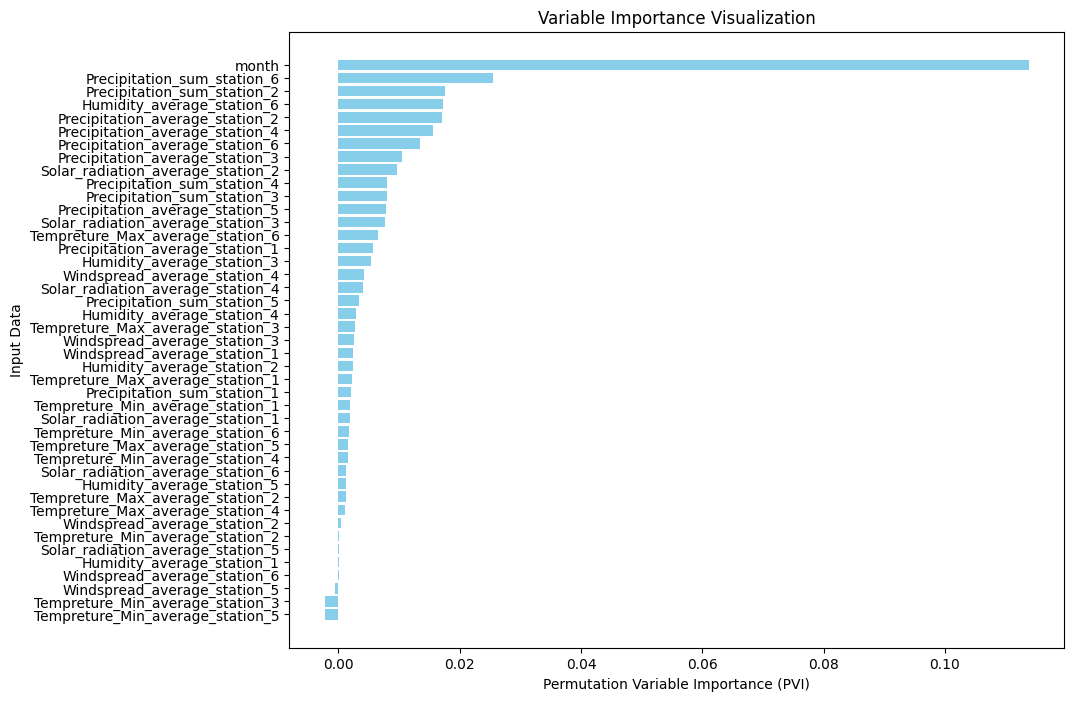

<Figure size 640x480 with 0 Axes>

In [36]:
# Plot the PVI with ranks
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_pvi)), list(sorted_pvi.values()), align='center', color='skyblue')
plt.yticks(range(len(sorted_pvi)), list(sorted_pvi.keys()))
plt.xlabel('Permutation Variable Importance (PVI)')
plt.ylabel('Input Data')
plt.title('Variable Importance Visualization')
plt.gca().invert_yaxis()  # Reverse the order of features
plt.show()
plt.savefig('PVI.png')


In [37]:
# # Save to Excel
# pvi_df = pd.DataFrame(list(sorted_pvi.items()), columns=['Feature', 'PVI'])
# pvi_df.to_excel('pvi_values.xlsx', index=False)

## Group PVI 

In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Assuming X and y are your features and target values

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Set up cross-validation with 10 folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define groups of columns
groups = {
    'Percipitation': ['Precipitation_sum_station_1', 'Precipitation_sum_station_2', 'Precipitation_sum_station_3', 
                      'Precipitation_sum_station_4', 'Precipitation_sum_station_5', 'Precipitation_sum_station_6',
                      'Precipitation_average_station_1', 'Precipitation_average_station_2', 'Precipitation_average_station_3', 
                      'Precipitation_average_station_4', 'Precipitation_average_station_5', 'Precipitation_average_station_6'
                     ],
    'month': ['month'],
    'windspeed': ['Windspread_average_station_1', 'Windspread_average_station_2', 'Windspread_average_station_3', 
                  'Windspread_average_station_4', 'Windspread_average_station_5', 'Windspread_average_station_6'
                 ],
    'Tempreture': ['Tempreture_Max_average_station_1', 'Tempreture_Max_average_station_2', 'Tempreture_Max_average_station_3', 
                   'Tempreture_Max_average_station_4', 'Tempreture_Max_average_station_5', 'Tempreture_Max_average_station_6',
                   'Tempreture_Min_average_station_1', 'Tempreture_Min_average_station_2', 'Tempreture_Min_average_station_3', 
                   'Tempreture_Min_average_station_4', 'Tempreture_Min_average_station_5', 'Tempreture_Min_average_station_6', 
                  ],
    'Solar_radiation': ['Solar_radiation_average_station_1', 'Solar_radiation_average_station_2', 
                       'Solar_radiation_average_station_3', 'Solar_radiation_average_station_4', 
                       'Solar_radiation_average_station_5', 'Solar_radiation_average_station_6'
                       ],
    'Humidity': ['Humidity_average_station_1', 'Humidity_average_station_2', 'Humidity_average_station_3', 
                'Humidity_average_station_4', 'Humidity_average_station_5', 'Humidity_average_station_6'
                ]
}

# Initialize lists to store the baseline and permuted MAE
baseline_mae_list = []
group_permuted_mae_dict = {group: [] for group in groups}

# Perform cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the model
    rf.fit(X_train, y_train)
    
    # Calculate baseline MAE
    base_mae = mean_absolute_error(y_test, rf.predict(X_test))
    baseline_mae_list.append(base_mae)
    
    # Calculate permuted MAE for each group
    for group_name, group_columns in groups.items():
        X_test_permuted = X_test.copy()
        X_test_permuted[group_columns] = X_test_permuted[group_columns].apply(np.random.permutation)
        permuted_mae = mean_absolute_error(y_test, rf.predict(X_test_permuted))
        group_permuted_mae_dict[group_name].append(permuted_mae)

# Calculate average baseline MAE
average_baseline_mae = np.mean(baseline_mae_list)

# Calculate Group PVI for each group
group_pvi_values = {group: np.mean(mae_list) - average_baseline_mae for group, mae_list in group_permuted_mae_dict.items()}

# Sorting the dictionary by its values in descending order
sorted_group_pvi = sorted(group_pvi_values.items(), key=lambda item: item[1], reverse=True)

# Convert the sorted items back into a dictionary if needed
sorted_group_pvi = dict(sorted_group_pvi)

print(len(sorted_group_pvi))
print(sorted_group_pvi)


6
{'Percipitation': 0.2638856186776279, 'month': 0.12267891990207475, 'Humidity': 0.026170911318231016, 'Solar_radiation': 0.023913006381187873, 'windspeed': 0.01712207471183419, 'Tempreture': 0.004161462008623273}


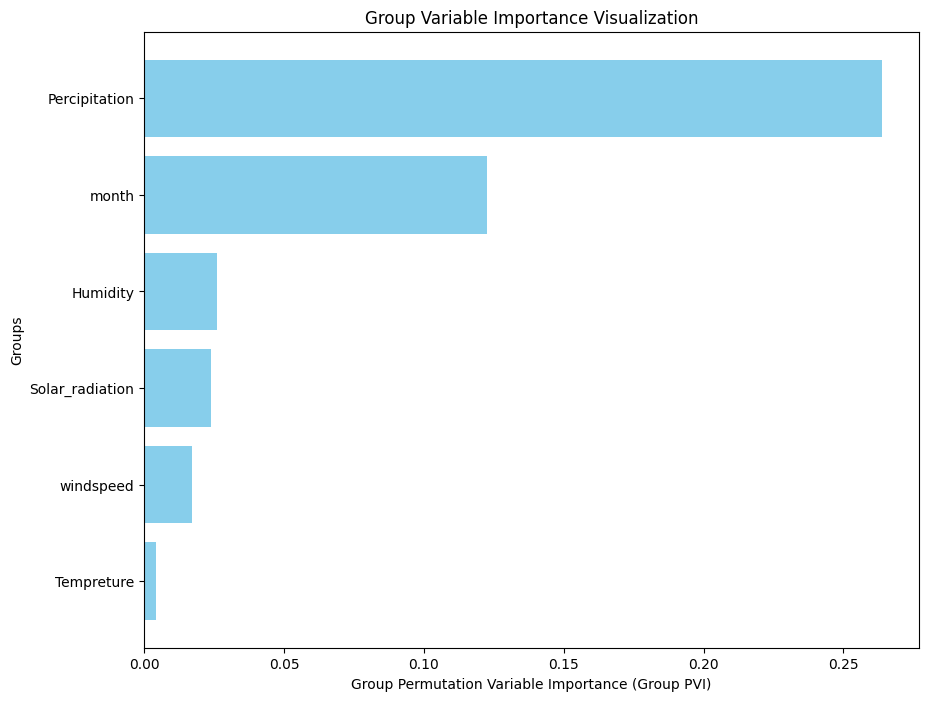

<Figure size 640x480 with 0 Axes>

In [39]:
# Plot the Group PVI
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_group_pvi)), list(sorted_group_pvi.values()), align='center', color='skyblue')
plt.yticks(range(len(sorted_group_pvi)), list(sorted_group_pvi.keys()))
plt.xlabel('Group Permutation Variable Importance (Group PVI)')
plt.ylabel('Groups')
plt.title('Group Variable Importance Visualization')
plt.gca().invert_yaxis()  # Reverse the order of groups
plt.show()
plt.savefig('Group PVI.png', dpi=300, bbox_inches='tight')


In [40]:
# # Save to Excel
# group_pvi_df = pd.DataFrame(list(sorted_group_pvi.items()), columns=['Group', 'Group PVI'])
# group_pvi_df.to_excel('group_pvi_values.xlsx', index=False)

## Group PVI by stations

In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Assuming X and y are your features and target values

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Set up cross-validation with 10 folds
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Define groups of columns
groups = {
    'month': ['month'],
    'station_1': [
        'Precipitation_sum_station_1',
        'Precipitation_average_station_1',
        'Windspread_average_station_1',
        'Tempreture_Max_average_station_1',
        'Tempreture_Min_average_station_1',
        'Solar_radiation_average_station_1',
        'Humidity_average_station_1'
    ],
    'station_2': [
        'Precipitation_sum_station_2',
        'Precipitation_average_station_2',
        'Windspread_average_station_2',
        'Tempreture_Max_average_station_2',
        'Tempreture_Min_average_station_2',
        'Solar_radiation_average_station_2',
        'Humidity_average_station_2'
    ],
    'station_3': [
        'Precipitation_sum_station_3',
        'Precipitation_average_station_3',
        'Windspread_average_station_3',
        'Tempreture_Max_average_station_3',
        'Tempreture_Min_average_station_3',
        'Solar_radiation_average_station_3',
        'Humidity_average_station_3'
    ],
    'station_4': [
        'Precipitation_sum_station_4',
        'Precipitation_average_station_4',
        'Windspread_average_station_4',
        'Tempreture_Max_average_station_4',
        'Tempreture_Min_average_station_4',
        'Solar_radiation_average_station_4',
        'Humidity_average_station_4'
    ],
    'station_5': [
        'Precipitation_sum_station_5',
        'Precipitation_average_station_5',
        'Windspread_average_station_5',
        'Tempreture_Max_average_station_5',
        'Tempreture_Min_average_station_5',
        'Solar_radiation_average_station_5',
        'Humidity_average_station_5'
    ],
    'station_6': [
        'Precipitation_sum_station_6',
        'Precipitation_average_station_6',
        'Windspread_average_station_6',
        'Tempreture_Max_average_station_6',
        'Tempreture_Min_average_station_6',
        'Solar_radiation_average_station_6',
        'Humidity_average_station_6'
    ]
}


# Initialize lists to store the baseline and permuted MAE
baseline_mae_list = []
group_permuted_mae_dict = {group: [] for group in groups}

# Perform cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the model
    rf.fit(X_train, y_train)
    
    # Calculate baseline MAE
    base_mae = mean_absolute_error(y_test, rf.predict(X_test))
    baseline_mae_list.append(base_mae)
    
    # Calculate permuted MAE for each group
    for group_name, group_columns in groups.items():
        X_test_permuted = X_test.copy()
        X_test_permuted[group_columns] = X_test_permuted[group_columns].apply(np.random.permutation)
        permuted_mae = mean_absolute_error(y_test, rf.predict(X_test_permuted))
        group_permuted_mae_dict[group_name].append(permuted_mae)

# Calculate average baseline MAE
average_baseline_mae = np.mean(baseline_mae_list)

# Calculate Group PVI for each group
group_pvi_values = {group: np.mean(mae_list) - average_baseline_mae for group, mae_list in group_permuted_mae_dict.items()}

# Sorting the dictionary by its values in descending order
sorted_group_pvi = sorted(group_pvi_values.items(), key=lambda item: item[1], reverse=True)

# Convert the sorted items back into a dictionary if needed
sorted_group_pvi = dict(sorted_group_pvi)

print(len(sorted_group_pvi))
print(sorted_group_pvi)


7
{'month': 0.11344051554702328, 'station_6': 0.09105944984808534, 'station_2': 0.07022612747852569, 'station_3': 0.03612611689381762, 'station_4': 0.034488565105159186, 'station_5': 0.03118274455290626, 'station_1': 0.019126607486774472}


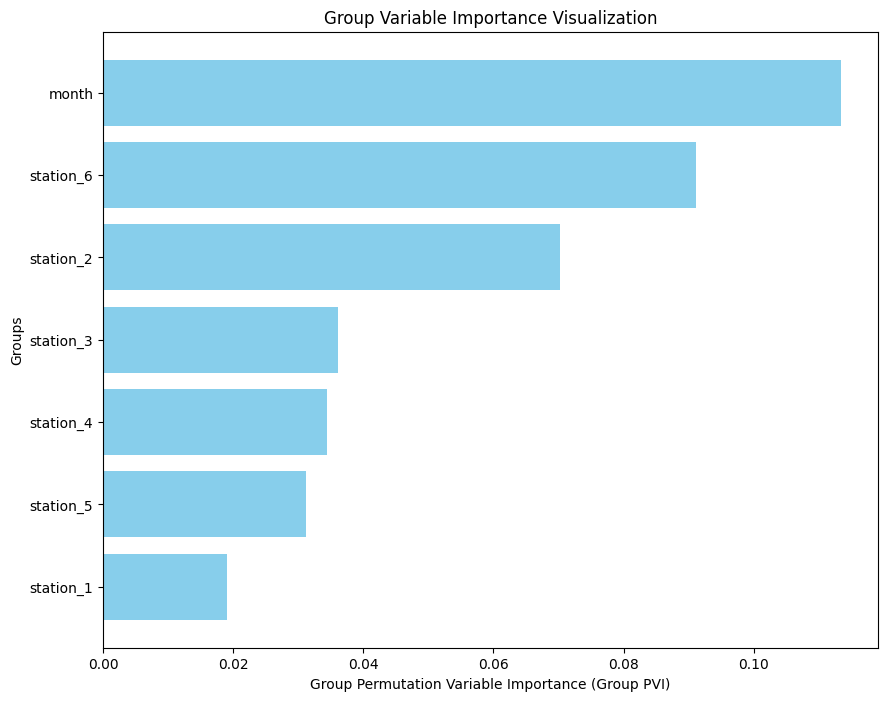

<Figure size 640x480 with 0 Axes>

In [42]:
# Plot the Group PVI
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_group_pvi)), list(sorted_group_pvi.values()), align='center', color='skyblue')
plt.yticks(range(len(sorted_group_pvi)), list(sorted_group_pvi.keys()))
plt.xlabel('Group Permutation Variable Importance (Group PVI)')
plt.ylabel('Groups')
plt.title('Group Variable Importance Visualization')
plt.gca().invert_yaxis()  # Reverse the order of groups
plt.show()
plt.savefig('Group PVI_by_stations.png', dpi=300, bbox_inches='tight')


In [ ]:
# # Save to Excel
# group_pvi_df = pd.DataFrame(list(sorted_group_pvi.items()), columns=['Group', 'Group PVI'])
# group_pvi_df.to_excel('group_pvi_by_stations.xlsx', index=False)